# Lab 5
# 0. Intro
Welcome to Lab 5! In this lab we will:

* Review tables and histograms
* Create functions
* Learn about methods for sampling

The data used in this lab will contain salary data and statistics for basketball players from the 2014-2015 NBA season. This data was collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


# 1. Review: Tables and histograms

**Question 1.0.** Load the data from `player_data.csv` into a table called `player_data`, and load the data from `salary_data.csv` into a table called `salary_data`.

In [2]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


In [3]:
_ = lab05.grade('q10')

The `join` function combines two tables using a shared column. If you're curious about how to use functions related to tables, review the documentation at: [www.data8.org/datascience/tables](http://www.data8.org/datascience/tables).

**Question 1.1.** Create a table called `full_data` by joining the `player_data` and `salary_data` tables on the players' names. There should be 492 rows in `full_data`.

In [6]:
full_data = player_data.join('Name',salary_data,'PlayerName')
full_data

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
A.J. Price,28,TOT,26,32,46,7,0,14,133,62552
Aaron Brooks,30,CHI,82,166,261,54,15,157,954,1145685
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Adreian Payne,23,TOT,32,162,30,19,9,44,213,1855320
Al Horford,28,ATL,76,544,244,68,98,100,1156,12000000
Al Jefferson,30,CHO,65,548,113,47,84,68,1082,13666667
Al-Farouq Aminu,24,DAL,74,342,59,70,62,55,412,1100602
Alan Anderson,32,BRK,74,204,83,56,5,60,545,1276061
Alec Burks,23,UTA,27,114,82,17,5,52,374,3034356
Alex Kirk,23,CLE,5,1,1,0,0,0,4,507336


In [5]:
_ = lab05.grade('q11')

The two columns we'll be using for this lab are `Age` and `Salary`.  Let's compute some *statistics* from these data.  A statistic is a number or fact about a sample of some population.

**Question 1.2.** Using `full_data`, make a histogram of `Age`, with 1 year per bin, and a histogram of `Salary`, with bins of width $1,000,000.  Pick the bins so that you can see all the data. In your call to `hist`, you can use `unit='year'` to set the units of the `Age` histogram (and likewise `unit='$'` to set the units of the `Salary` histogram). You can find examples of the `hist` function in [the textbook](http://www.inferentialthinking.com/chapter2/histograms.html) or [datascience documentation](http://data8.org/datascience/_autosummary/datascience.tables.Table.hist.html?highlight=hist#datascience.tables.Table.hist).

14409
23500000


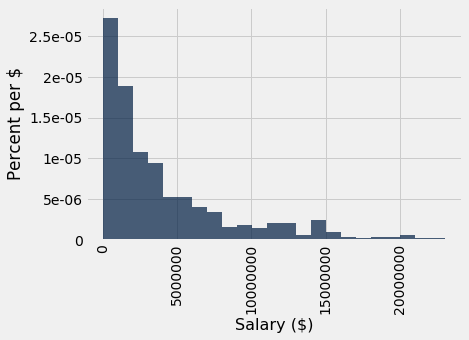

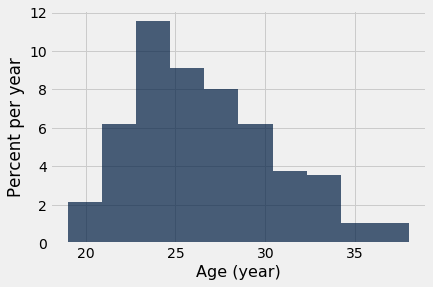

In [52]:
print(np.min(full_data.column('Salary')))
print(np.max(full_data.column('Salary')))
full_data.select('Salary').hist(bins = np.arange(14409,23500000, 1000000),unit='$')
full_data.select('Age').hist(bins = None,unit='year')

**Question 1.3.** Set `average_age` to the average (mean) age and `average_salary` to the average (mean) salary.

In [41]:
average_age = np.mean(full_data.column('Age'))
average_salary =  np.mean(full_data.column('Salary'))
print(average_age,average_salary)

26.5365853659 4269775.76626


In [8]:
_ = lab05.grade('q13')

# 2. Functions

To save typing and increase the clarity of your code, we will package the loading and analysis code from the previous section into two functions. This will be useful in the rest of the lab as we will repeatedly need to create histograms and collect summary statistics from that data. 

** Question 2.0. ** Complete the `histograms` function, which takes a `table` with columns `Age` and `Salary` and draws a histogram for each one. Use the `min` and `max` functions to pick the bin boundaries so that all data appears for any table passed to your function. Use the same bin widths as before (1 year for `Age` and $1,000,000 for `Salary`).

Two histograms should be displayed below


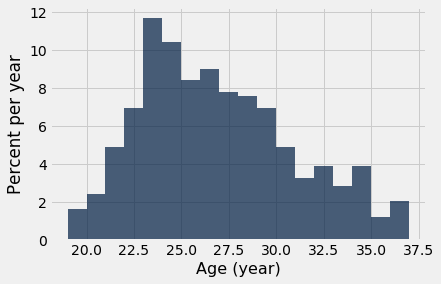

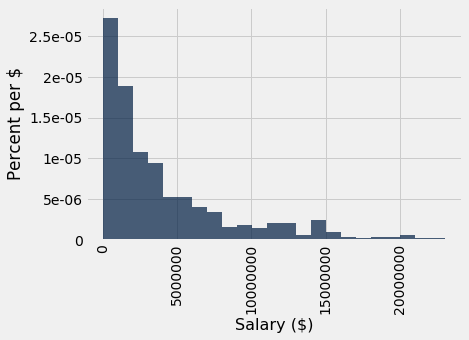

In [53]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = np.arange(np.min(t.column('Age')),np.max(t.column('Age')), 1)
    salary_bins =  np.arange(np.min(t.column('Salary')),np.max(t.column('Salary')), 1000000)
    t.hist('Age', bins=age_bins, unit='year')
    t.hist('Salary', bins=salary_bins, unit='$')
    return age_bins # Keep this statement so that your work can be checked
    
histograms(full_data)
print('Two histograms should be displayed below')

** Question 2.1. ** Create a function called `compute_statistics` that takes a `Table` containing ages and salaries and:

* Draws a histogram of ages
* Draws a histogram of salaries
* Return a two-element list containing the average age and average salary

You can call your `histograms` function to draw the histograms!

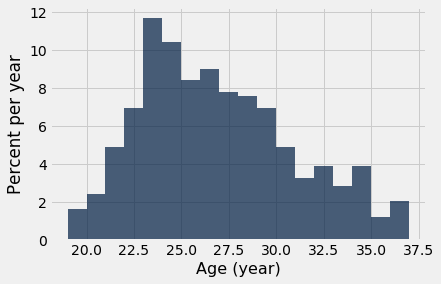

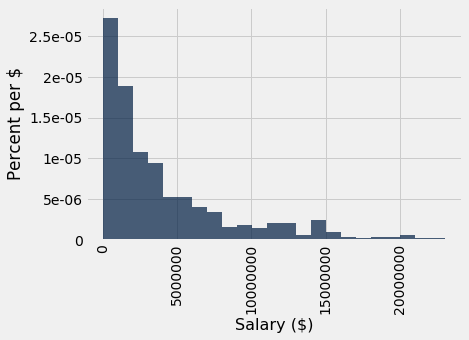

In [54]:
def compute_statistics(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = np.arange(np.min(t.column('Age')),np.max(t.column('Age')), 1)
    salary_bins =  np.arange(np.min(t.column('Salary')),np.max(t.column('Salary')), 1000000)
    t.hist('Age', bins=age_bins, unit='year')
    t.hist('Salary', bins=salary_bins, unit='$')
    return [np.mean(t.column('Age')),np.mean( t.column('Salary'))]
    
full_stats = compute_statistics(full_data)

In [12]:
_ = lab05.grade('q21') # Warning: Charts will be displayed while running this test

# 3. Sampling
Rather than getting data on every player, imagine that we had gotten data on only a smaller subset of the players.  For 492 players, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

A statistical inference is a statement about some statistic of the underlying population, such as "the average salary of NBA players in 2014 was $3".  You may have heard the word "inference" used in other contexts.  It's important to keep in mind that statistical inferences, unlike, say, logical inferences, can be wrong.

A general strategy for inference using samples is to estimate statistics of the population by computing the same statistics on a sample.  This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors, and we'll touch lightly on a few of those today.

One very important factor in the utility of samples is how they were gathered.  We have prepared some example sample datasets to simulate inference from different kinds of samples for the NBA player dataset.  Later we'll ask you to create your own samples to see how they behave.

## 3.0 Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose players who are somehow convenient to sample.  For example, you might choose players from one team that's near your house, since it's easier to survey them.  This is called, somewhat pejoratively, *convenience sampling*.

Suppose you survey only *relatively new* players with ages less than 22.  (The more experienced players didn't bother to answer your surveys about their salaries.)

**Question 3.0.0**  Assign `convenience_sample_data` to a subset of `full_data` that contains only the rows for players under the age of 22.

In [55]:
convenience_sample = full_data.where('Age', are.below(22))
convenience_sample

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points,Salary
Aaron Gordon,19,ORL,47,169,33,21,22,38,243,3992040
Alex Len,21,PHO,69,454,32,34,105,74,432,3649920
Andre Drummond,21,DET,82,1104,55,73,153,120,1130,2568360
Andrew Wiggins,19,MIN,82,374,170,86,50,177,1387,5510640
Anthony Bennett,21,MIN,57,216,48,27,16,36,298,5563920
Anthony Davis,21,NOP,68,696,149,100,200,95,1656,5607240
Archie Goodwin,20,PHO,41,74,44,18,9,48,231,1112280
Ben McLemore,21,SAC,82,241,140,77,19,138,996,3026280
Bradley Beal,21,WAS,63,241,194,76,18,123,962,4505280
Bruno Caboclo,19,TOR,8,2,0,0,1,4,10,1458360


In [14]:
_ = lab05.grade('q300')

**Question 3.0.1.** Assign `convenience_stats` to a list of the average age and average salary of your convenience sample, using the `compute_statistics` function.  Since they're computed on a sample, these are called *sample averages*. 

In [56]:
convenience_stats = [np.mean(convenience_sample.column('Age')),np.mean(convenience_sample.column('Salary'))]
convenience_stats

[20.363636363636363, 2383533.8181818184]

In [16]:
_ = lab05.grade('q301')

Next, we'll compare the convenience sample salaries with the full data salaries in a single histogram. To do that, we'll need to use the `counts` option of the `hist` method, which indicates that all columns are counts of the bins in a particular column. The following cell should not require any changes; just run it.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:2449: UserWarning: counts arg of hist is deprecated; use bin_column
  warnings.warn("counts arg of hist is deprecated; use bin_column")


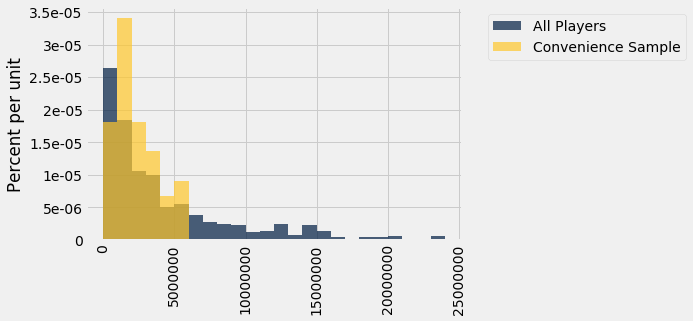

In [57]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    max_salary = max(np.append(first.column('Salary'), second.column('Salary')))
    bins = np.arange(0, max_salary+1e6+1, 1e6)
    first_binned = first.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(counts='bin')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

**Question 3.0.2.** Does the convenience sample give us an accurate picture of the age and salary of the full population of NBA players in 2014-2015?  Would you expect it to, in general?  Before you move on, write a short answer in English below.  You can refer to the statistics calculated above or perform your own analysis.

In this case the convenience sample is accurate in encapsulating that most players don't earn a extremely high salaries. It depicts much lower salaries that the peak players. It completely ignores older players with more significant incomes. This sample loses all information about the more successful players. 

## 3.1 Simple random sampling
A more principled approach is to sample uniformly at random from the players.  If we ensure that each player is selected at most once, this is a *simple random sample without replacement*, sometimes abbreviated to "simple random sample" or "SRSWOR".  Imagine writing down each player's name on a card, putting the cards in an urn, and shuffling the urn.  Then, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two samples of the `salary_data` table in this way: `small_srswor_salary.csv` and `large_srswor_salary.csv` contain, respectively, a sample of size 44 (the same as the convenience sample) and a larger sample of size 100.  

The `load_data` function below loads a salary table and joins it with `player_data`.

In [58]:
def load_data(salary_file):
    return player_data.join('Name', Table.read_table(salary_file), 'PlayerName')

**Question 3.1.0.** Run the same analyses on the small and large samples that you previously ran on the full dataset and on the convenience sample.  Compare the accuracy of the estimates of the population statistics that we get from the convenience sample, the small simple random sample, and the large simple random sample.  (Just notice this for yourself -- the autograder will check your sample statistics but will not validate whatever you do to compare.)

Full data stats:                  [26.536585365853657, 4269775.7662601629]
Small simple random sample stats: [26.318181818181817, 4283910.8863636367]
Large simple random sample stats: [26.420000000000002, 4821322.5]


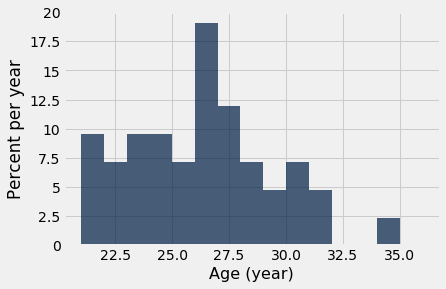

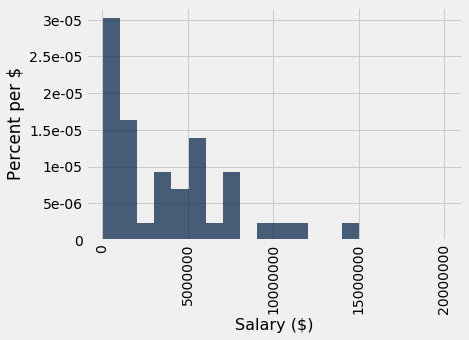

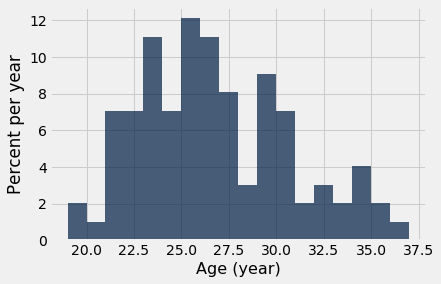

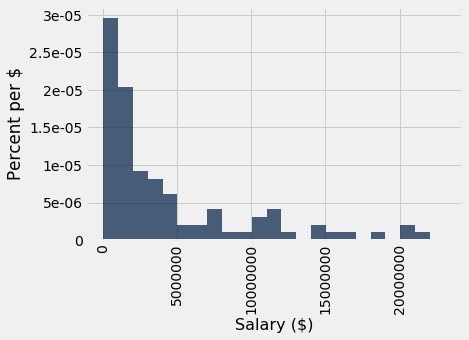

In [59]:
small_srswor_data = load_data('small_srswor_salary.csv')
small_stats = compute_statistics(small_srswor_data)
large_srswor_data = load_data('large_srswor_salary.csv')
large_stats = compute_statistics(large_srswor_data)
print('Full data stats:                 ', full_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)

In [20]:
_ = lab05.grade('q310')

## 3.2 Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  The randomized response technique was one example we saw in lecture.  Another is to help us understand how inaccurate other samples are.

Tables provide the method `sample()` for producing random samples.  To see how to call `sample()`, search the documentation on `data8.org/datascience`, or enter `full_data.sample?` into a code cell and press Enter.

**Question 3.1.1.** Produce a simple random sample of size 44 from `full_data`.  (You don't need to bother with a join this time -- just use `full_data.sample(...)` directly.  That will have the same result as sampling from `salary_data` and joining with `player_data`.)  Run your analysis on it again.  Are your results similar to those in the small sample we provided you?  Run your code several times to get new samples.  How much do things change across samples?

[25.90909090909091, 3700127.0681818184]

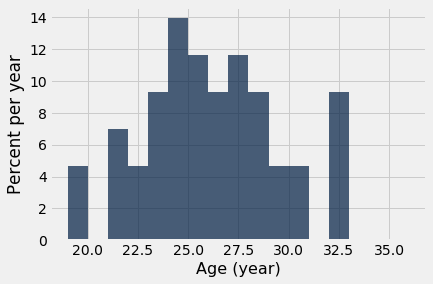

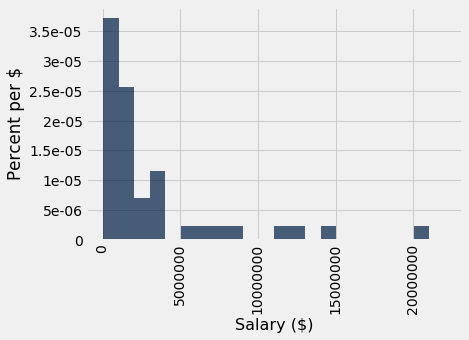

In [60]:
my_small_srswor_data = full_data.sample(44)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

This sample is very off from what we want. The salary is 5k off when compared with the full data average salary. 

**Question 3.1.2.** As in the previous question, analyze several simple random samples of size 100 from `full_data`.  Do the average and histogram statistics seem to change more or less across samples of this size than across samples of size 44?  And are the sample averages and histograms closer to their true values for age or for salary?  What did you expect to see?

In [61]:
my_large_srswor_data =full_data.sample(100)
my_large_srswor_age_avg  = np.mean(my_large_srswor_data.column('Age'))
my_large_srswor_salary_avg  = np.mean(my_large_srswor_data.column('Salary'))
[my_large_srswor_age_avg, my_large_srswor_salary_avg]

[26.690000000000001, 4304274.6299999999]

This is very close to the full data mean. This example approximates better than the smaller random sample and that the convenience sample. It ge

In [23]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [lab05.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

In [24]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

!TZ=America/Los_Angeles ipython nbconvert --output=".lab05_$(date +%m%d_%H%M)_submission.html" lab05.ipynb && echo "Submitted Successfully"